<a href="https://colab.research.google.com/github/YunHo0325/ai_lecture/blob/main/src/fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


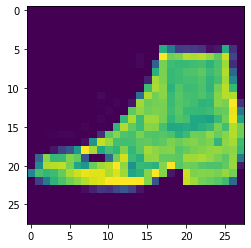

In [19]:
plt.imshow(x_train[0])

In [7]:
# 전처리
#x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.3, 
                                                  random_state=2020)

In [13]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_val_oh = tf.keras.utils.to_categorical(y_val)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [16]:
def cnnModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [17]:
tf.keras.backend.clear_session()    # 세션 초기화
model = cnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [18]:
# 모델 훈련
history = model.fit(x_train, y_train_oh, 
                    epochs=20,
                    validation_data=(x_val, y_val_oh))

Epoch 1/20
919/919 [==============================] - 60s 64ms/step - loss: 0.9569 - accuracy: 0.6393 - val_loss: 0.6216 - val_accuracy: 0.7580
Epoch 2/20
919/919 [==============================] - 59s 65ms/step - loss: 0.6484 - accuracy: 0.7546 - val_loss: 0.5867 - val_accuracy: 0.7785
Epoch 3/20
919/919 [==============================] - 59s 64ms/step - loss: 0.5980 - accuracy: 0.7745 - val_loss: 0.5206 - val_accuracy: 0.8098
Epoch 4/20
919/919 [==============================] - 60s 65ms/step - loss: 0.5598 - accuracy: 0.7903 - val_loss: 0.5142 - val_accuracy: 0.8019
Epoch 5/20
919/919 [==============================] - 59s 65ms/step - loss: 0.5316 - accuracy: 0.8009 - val_loss: 0.4649 - val_accuracy: 0.8287
Epoch 6/20
919/919 [==============================] - 60s 65ms/step - loss: 0.5034 - accuracy: 0.8095 - val_loss: 0.4392 - val_accuracy: 0.8346
Epoch 7/20
919/919 [==============================] - 59s 64ms/step - loss: 0.4702 - accuracy: 0.8238 - val_loss: 0.4124 - val_accuracy:

In [21]:
# 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.3293 - accuracy: 0.8790
테스트 정확도: 0.8790000081062317
